<a href="https://colab.research.google.com/github/Abhishekpn09/Data-Analysis-projects/blob/main/Machine_Learning_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Testing Data.csv')

**DATA EXPLORATION**


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.shape

(367, 12)

In [ ]:
df.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
df.isnull().sum().sum()

84

**DATA VISUALISATION**

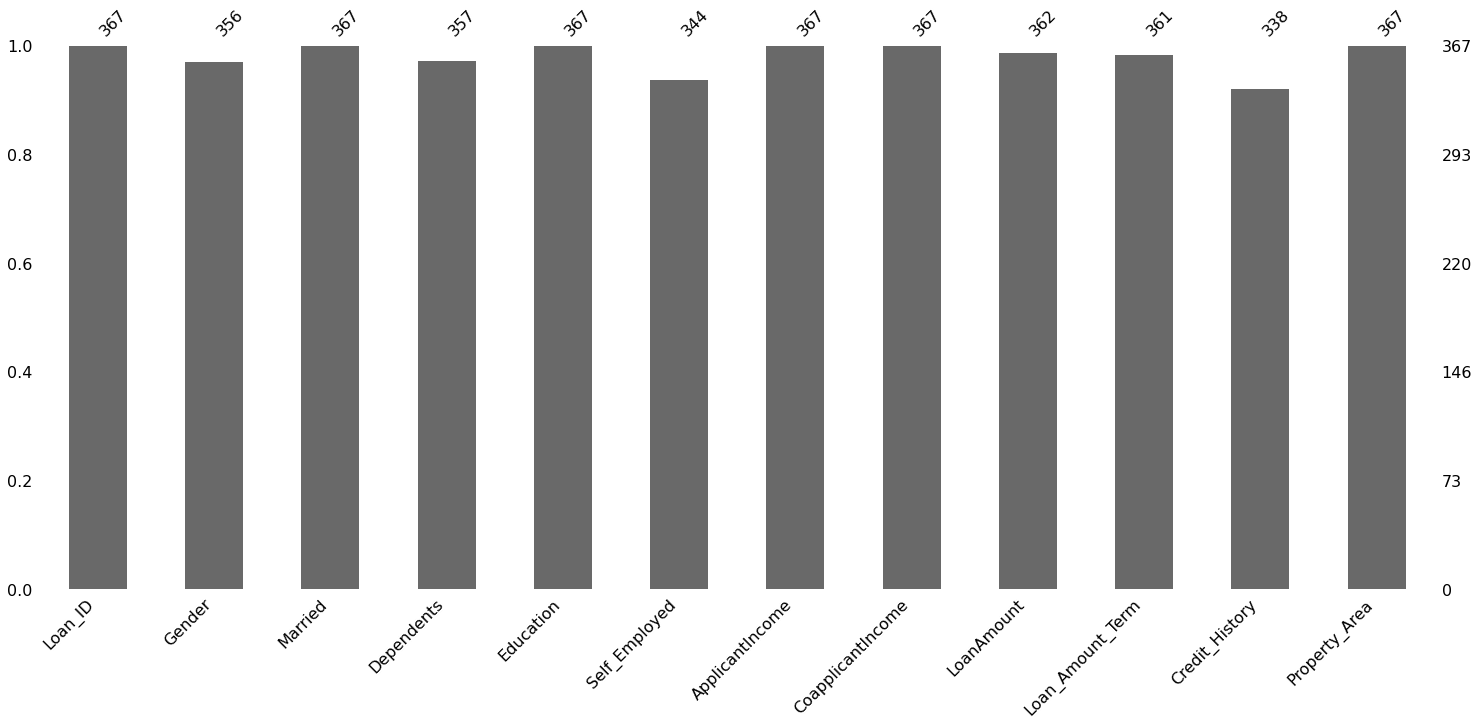

In [ ]:
msno.bar(df)

In [ ]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)

df = pd.concat([df, Gender], axis=1)

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [ ]:
df['Male'] = df['Male'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Male               367 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 37.4+ KB


RATIO OF MALE AND FEMALE

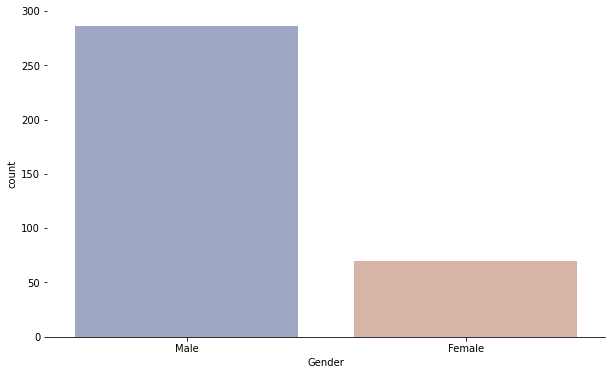

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df, palette='dark', alpha=0.4)
sns.despine(left=True)

**DATA MANIPULATION**

In [ ]:
df.Gender.replace(['Male','Female'],[1,0],inplace=True)

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male
0,LP001015,1.0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,1.0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,1.0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1.0


In [ ]:
df.drop(['Loan_ID','Dependents','CoapplicantIncome','Property_Area'], axis=1, inplace=True)


In [ ]:
df.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male
0,1.0,Yes,Graduate,No,5720,110.0,360.0,1.0,1.0
1,1.0,Yes,Graduate,No,3076,126.0,360.0,1.0,1.0
2,1.0,Yes,Graduate,No,5000,208.0,360.0,1.0,1.0
3,1.0,Yes,Graduate,No,2340,100.0,360.0,NaN,1.0
4,1.0,No,Not Graduate,No,3276,78.0,360.0,1.0,1.0


In [ ]:
df.Gender.unique()

array([ 1.,  0., nan])

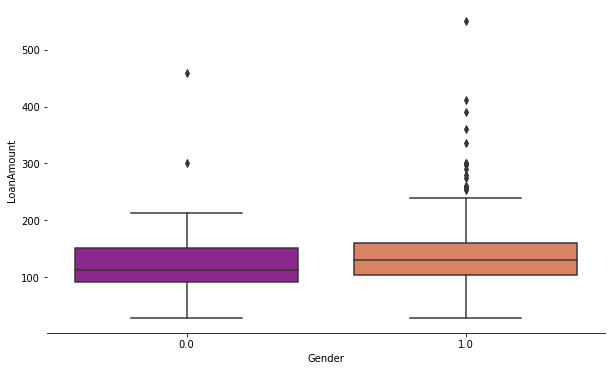

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='LoanAmount', data=df, palette='plasma')
sns.despine(left=True)


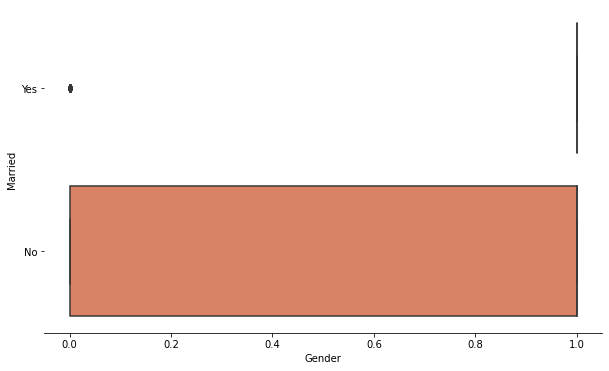

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Married', data=df, palette='plasma')
sns.despine(left=True)


In [ ]:
df.loc[df.Married == 4,['Gender','Education']],[df.Married == 1]


(Empty DataFrame
 Columns: [Gender, Education]
 Index: [], [0      False
  1      False
  2      False
  3      False
  4      False
         ...  
  362    False
  363    False
  364    False
  365    False
  366    False
  Name: Married, Length: 367, dtype: bool])

HOW MANY MALE AND FEMALE ARE MARRIED  AND NON MARRIED

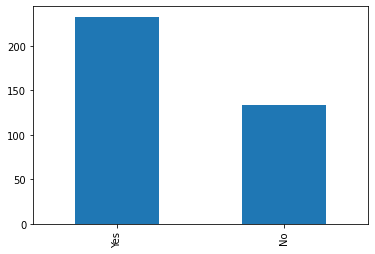

In [ ]:
df.Married.value_counts().plot.bar()

IS IT MALE OR FEMALE WHOSE LOAN AMOUNT IS HIGHEST

In [ ]:
df.nlargest(1,'LoanAmount')[['Gender','LoanAmount']]


,Gender,LoanAmount
143,1.0,550.0


In [ ]:
df.sort_values(by='LoanAmount', ascending =False).head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male
143,1.0,Yes,Graduate,Yes,32000,550.0,360.0,NaN,1.0
284,0.0,Yes,Graduate,No,10000,460.0,360.0,1.0,0.0
194,1.0,Yes,Graduate,No,10000,412.0,360.0,1.0,1.0
91,1.0,Yes,Graduate,No,13518,390.0,360.0,1.0,1.0
81,1.0,Yes,Graduate,No,72529,360.0,360.0,1.0,1.0
189,1.0,Yes,Graduate,No,7874,336.0,360.0,1.0,1.0
124,0.0,No,Graduate,No,12500,300.0,360.0,0.0,0.0
331,1.0,Yes,Graduate,No,9699,300.0,360.0,1.0,1.0
18,1.0,Yes,Graduate,No,9226,300.0,360.0,1.0,1.0
285,1.0,Yes,Graduate,NaN,8750,297.0,360.0,1.0,1.0


THE APPLICANT WHO HAS HIGHEST INCOME

In [ ]:
df.nlargest(1,'ApplicantIncome')[['Gender','ApplicantIncome']]


,Gender,ApplicantIncome
81,1.0,72529


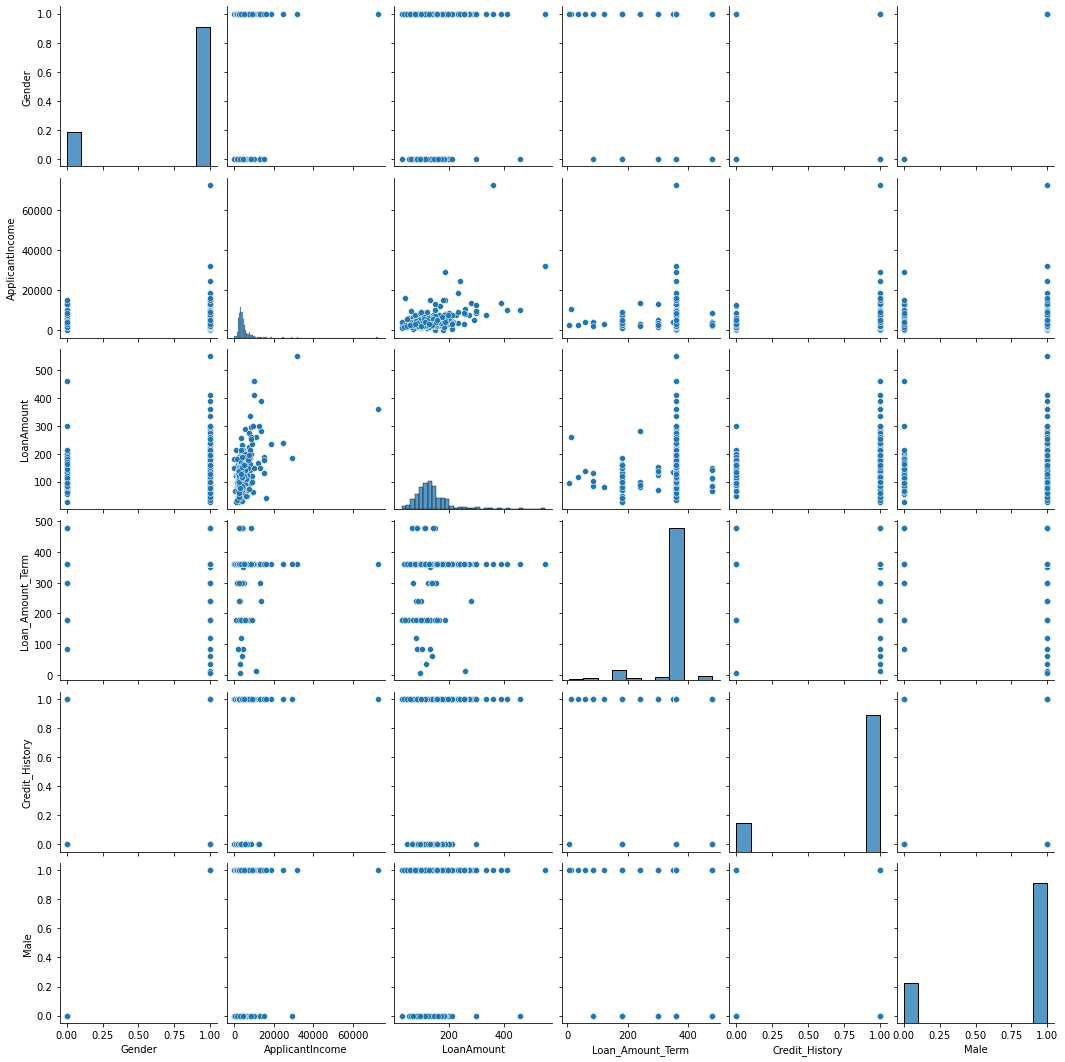

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Gender,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male
Gender,1.000000,0.063773,0.078475,-0.064268,0.037465,1.000000
ApplicantIncome,0.063773,1.000000,0.493451,0.023249,0.099553,0.048762
LoanAmount,0.078475,0.493451,1.000000,0.094950,-0.012578,0.088827
Loan_Amount_Term,-0.064268,0.023249,0.094950,1.000000,-0.053593,-0.061075
Credit_History,0.037465,0.099553,-0.012578,-0.053593,1.000000,0.035795
Male,1.000000,0.048762,0.088827,-0.061075,0.035795,1.000000


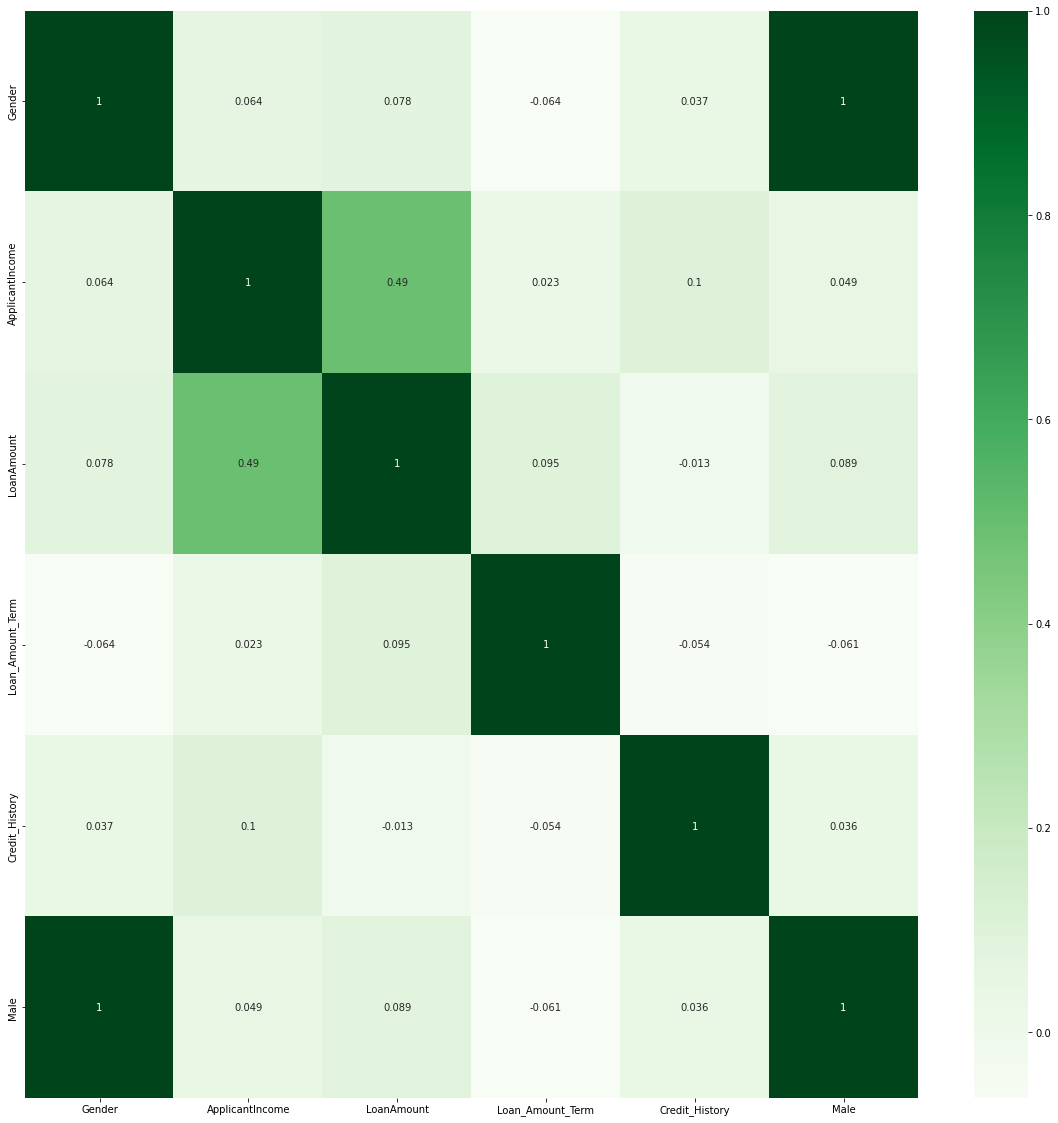

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [ ]:
df['Credit_History'] = df['Credit_History'].replace(np.nan, 0)


In [ ]:
df.isnull().dtypes

Gender              bool
Married             bool
Education           bool
Self_Employed       bool
ApplicantIncome     bool
LoanAmount          bool
Loan_Amount_Term    bool
Credit_History      bool
Male                bool
dtype: object

**Scaling the data to perform Regression**


In [ ]:
X = df.drop(['Married','Loan_Amount_Term','Education','Self_Employed','LoanAmount','Gender'], axis=1)
y = df['Credit_History']


In [ ]:
X.head()

,ApplicantIncome,Credit_History,Male
0,5720,1.0,1.0
1,3076,1.0,1.0
2,5000,1.0,1.0
3,2340,0.0,1.0
4,3276,1.0,1.0


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)


In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()


,ApplicantIncome,Credit_History,Male
0,0.186461,0.561616,0.532181
1,-0.352692,0.561616,0.532181
2,0.039641,0.561616,0.532181
3,-0.502774,-1.780577,0.532181
4,-0.311909,0.561616,0.532181


# **Logistic Regression**

In [ ]:
test=SelectKBest(score_func=chi2,k=2)
fit=test.fit(X,y)
print(fit.scores_)

[9.95194664e+03 8.80000000e+01 4.77423969e-02]


**Performing train test split**

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(scaled_data,y, test_size=0.2, random_state=10)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
prediction = logreg.predict(X_test)

In [ ]:
y_train_predict = logreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = logreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 0.0


The model performance for testing set
RMSE is 0.0


In [ ]:
print(logreg.coef_)
print(logreg.intercept_)

[[0.07368937 3.70789396 0.04678437]]
[2.86197122]


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



**Evaluation process**



* **KNN Classifer**


*   Classify the same data
*   Perform elbow method
*   Analyse the data
*   Evaluate





In [ ]:
error_rate = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_k = knn.predict(X_test)
    error_rate.append(np.mean(prediction_k !=y_test))

In [ ]:
error_rate = pd.DataFrame(error_rate,range(1,16), columns=['Error Rate']).reset_index()
error_rate = error_rate.rename(columns={'index': 'K Value'})

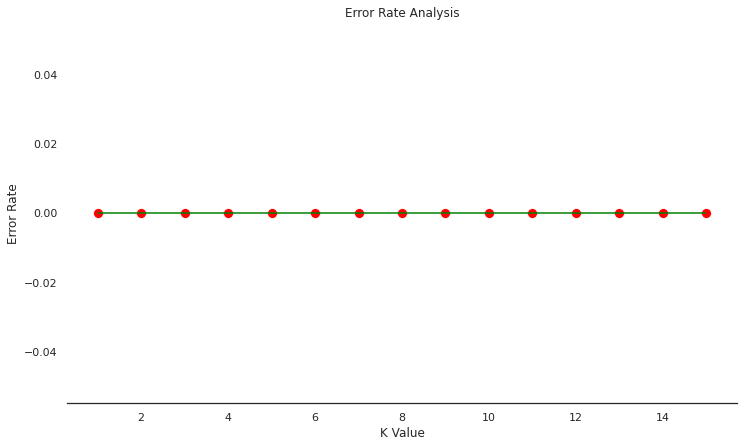

In [ ]:
plt.figure(figsize=(12,7))
g = sns.set(style="white")
g = sns.lineplot(x='K Value', y='Error Rate', data=error_rate, color='green')
f = sns.scatterplot(x='K Value', y='Error Rate', data=error_rate, color='red', s=100)

g.set_title('Error Rate Analysis')
g.set_ylabel('Error Rate')
g.set_xlabel('K Value')
g =sns.despine(left=True)

**K Nearest Neighor Classification**


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction_5 = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction_k))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

